# import dataset and dispaly dataset

In [1]:
import pandas as pd
messages = pd.read_csv("C:\\Users\\reddy\\Desktop\\youtube spam message detection.csv")
print(messages)

                                               CONTENT  LABEL
0    Yes ...  education and behavior and positive t...      0
1    Education is very important the more you learn...      0
2    Awesome story I prepared it for my school comp...      0
3                   from where you source your stories      1
4    Education is the key to acchieve success it's ...      0
..                                                 ...    ...
993                Check out this video on YouTube:���      1
994                Check out this video on YouTube:���      1
995  Check out this playlist on YouTube:??<br /><br...      1
996                Check out this video on YouTube:���      1
997                      watch this with sound off!���      0

[998 rows x 2 columns]


# prepare train/test data and preprocess of text

In [2]:
messages = pd.read_csv("C:\\Users\\reddy\\Desktop\\youtube spam message detection.csv")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(messages['CONTENT'], 
                                                    messages['LABEL'], 
                                                    test_size =0.2, 
                                                    random_state=1)
print('Number of rows in the total set: {}'.format(messages.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))
print("X_train\n")
print(X_train)
print("X_test\n")
print(X_test)
print("y_train\n")
print(y_train)
print("y_test\n")
print(y_test)

Number of rows in the total set: 998
Number of rows in the training set: 798
Number of rows in the test set: 200
X_train

906                         everyday I&#39;m shufflin���
915                   5th most viewed video.. i guess���
980                  Check out this video on YouTube:���
47     This is why they say......'KEEP YOUR EYES ON T...
983                  Check out this video on YouTube:���
                             ...                        
767                                      Awsome<br />���
72                             subscribe like comment���
908    Thumbs up if FE-FE-FE-FE-FEGELEIN brought u he...
235    https://soundcloud.com/jackal-and-james/wrap-u...
37     No matter who the batsmen is, Dale steyn is st...
Name: CONTENT, Length: 798, dtype: object
X_test

358     I am so awesome and smart!!! Sucscribe to me!���
607    Since when has Katy Perry had her own YouTube ...
810                             Ah. Good old times (:���
918                           

# # Defining pre-processing hyperparameters

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

# Get the word_index 

In [4]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 '���': 2,
 'i': 3,
 'the': 4,
 'this': 5,
 'to': 6,
 'and': 7,
 'a': 8,
 '�': 9,
 'my': 10,
 'is': 11,
 'you': 12,
 'com': 13,
 'it': 14,
 'on': 15,
 'in': 16,
 'of': 17,
 'http': 18,
 'check': 19,
 'out': 20,
 'like': 21,
 'video': 22,
 'amp': 23,
 'please': 24,
 'for': 25,
 'song': 26,
 'www': 27,
 'me': 28,
 'so': 29,
 '��': 30,
 'subscribe': 31,
 'if': 32,
 'https': 33,
 'youtube': 34,
 'that': 35,
 'katy': 36,
 'have': 37,
 'channel': 38,
 'love': 39,
 '2': 40,
 'views': 41,
 'be': 42,
 'just': 43,
 'are': 44,
 '1': 45,
 'br': 46,
 'guys': 47,
 'but': 48,
 'music': 49,
 'your': 50,
 'perry': 51,
 'facebook': 52,
 'videos': 53,
 'was': 54,
 'she': 55,
 'at': 56,
 'all': 57,
 'get': 58,
 'can': 59,
 'watch': 60,
 'not': 61,
 'best': 62,
 'will': 63,
 'billion': 64,
 'do': 65,
 'people': 66,
 'hey': 67,
 'much': 68,
 'how': 69,
 'what': 70,
 'with': 71,
 'good': 72,
 'they': 73,
 'lt': 74,
 'one': 75,
 'her': 76,
 '39': 77,
 'there': 78,
 'new': 79,
 'he': 80,
 'here': 

# data visualization 

In [5]:
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  998 non-null    object
 1   LABEL    998 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


# outliers

In [6]:
spam= messages[messages['LABEL'] == 1]
ham= messages[messages['LABEL'] == 0]

outlier_fraction = len(spam) / float(len(ham))
print(outlier_fraction)

print('Spam Cases: {}'.format(len(spam)))
print('Ham Cases: {}'.format(len(ham)))

0.7417102966841187
Spam Cases: 425
Ham Cases: 573


In [7]:
print(messages.head())

                                             CONTENT  LABEL
0  Yes ...  education and behavior and positive t...      0
1  Education is very important the more you learn...      0
2  Awesome story I prepared it for my school comp...      0
3                 from where you source your stories      1
4  Education is the key to acchieve success it's ...      0


In [8]:
print(messages.tail())

                                               CONTENT  LABEL
993                Check out this video on YouTube:���      1
994                Check out this video on YouTube:���      1
995  Check out this playlist on YouTube:??<br /><br...      1
996                Check out this video on YouTube:���      1
997                      watch this with sound off!���      0


In [9]:
print(messages.isnull())


     CONTENT  LABEL
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
..       ...    ...
993    False  False
994    False  False
995    False  False
996    False  False
997    False  False

[998 rows x 2 columns]


In [10]:
print(messages.notnull())

     CONTENT  LABEL
0       True   True
1       True   True
2       True   True
3       True   True
4       True   True
..       ...    ...
993     True   True
994     True   True
995     True   True
996     True   True
997     True   True

[998 rows x 2 columns]


In [11]:
print(messages[0:22:2])

                                              CONTENT  LABEL
0   Yes ...  education and behavior and positive t...      0
2   Awesome story I prepared it for my school comp...      0
4   Education is the key to acchieve success it's ...      0
6   Never depend on anyone,trust urself,believe me...      0
8   I am a Mechanical Students. Everything is erro...      1
10  High school became less stressful the moment I...      0
12  One of my life's biggest regrets is not taking...      0
14      Teach people what they actually need to learn      0
16    I was born intelligent but education ruined me.      1
18  Education is not the learning of facts, but th...      0
20  Yes , I know education is powerful weapon. Mos...      0


In [12]:
messages.describe()

,LABEL
count,998.000000
mean,0.425852
std,0.494719
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

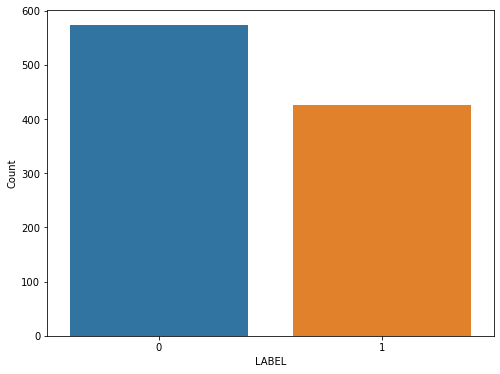

In [12]:
from matplotlib import pyplot
import seaborn as sns
pyplot.figure(figsize=(8,6))
sns.countplot(messages.LABEL)
pyplot.xlabel("LABEL")
pyplot.ylabel("Count")

# logistic regression

In [13]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix, roc_auc_score

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE 
messages = pd.read_csv("C:\\Users\\reddy\\Desktop\\youtube spam message detection.csv")
X_train, X_test, y_train, y_test = train_test_split(messages['CONTENT'], 
                                                    messages['LABEL'], 
                                                    test_size =0.2, 
                                                    random_state=1)
vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [78]:
from sklearn.metrics import confusion_matrix 
r = LogisticRegression(random_state=1)
r.fit(X_resample,y_resampled)
y_test_pred  = r.predict(X_resample)
y_test_prob = r.predict_proba(X_resample)[:,1]
print("Confusion Matrix : \n", format(confusion_matrix(y_resampled, y_test_pred)))
print("Accuracy Score  : ", format(accuracy_score(y_resampled, y_test_pred)))
print("Precision: ",format(precision_score(y_resampled,y_test_pred,average='macro')))
print("Recall: ",format(recall_score(y_resampled,y_test_pred,average='macro')))
print("F1 score: ", format(f1_score(y_resampled,y_test_pred,average='macro')))
print("ROC AUC: ",format(roc_auc_score(y_resampled, y_test_prob)))


Confusion Matrix : 
 [[452   0]
 [ 19 433]]
Accuracy Score  :  0.9789823008849557
Precision:  0.9798301486199575
Recall:  0.9789823008849557
F1 score:  0.9789730123461324
ROC AUC:  0.9990161719790118


# random forest 

In [80]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE 
messages = pd.read_csv("C:\\Users\\reddy\\Desktop\\youtube spam message detection.csv")
X_train, X_test, y_train, y_test = train_test_split(messages['CONTENT'], 
                                                    messages['LABEL'], 
                                                    test_size =0.2, 
                                                    random_state=1)
vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [76]:
from sklearn.metrics import confusion_matrix 
r = RandomForestClassifier(random_state=4)
r.fit(X_resample,y_resampled)
y_test_pred  = r.predict(X_resample)
y_test_prob = r.predict_proba(X_resample)[:,1]
print("Confusion Matrix : \n", format(confusion_matrix(y_resampled, y_test_pred)))
print("Accuracy Score  : ", format(accuracy_score(y_resampled, y_test_pred)))
print("Precision: ",format(precision_score(y_resampled,y_test_pred,average='macro')))
print("Recall: ",format(recall_score(y_resampled,y_test_pred,average='macro')))
print("F1 score: ", format(f1_score(y_resampled,y_test_pred,average='macro')))
print("ROC AUC: ",format(roc_auc_score(y_resampled, y_test_prob)))

Confusion Matrix : 
 [[447   5]
 [  0 452]]
Accuracy Score  :  0.9944690265486725
Precision:  0.9945295404814005
Recall:  0.9944690265486726
F1 score:  0.9944688573417965
ROC AUC:  0.9996328999921685


# Decision tree

In [82]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE 
messages = pd.read_csv("C:\\Users\\reddy\\Desktop\\youtube spam message detection.csv")
X_train, X_test, y_train, y_test = train_test_split(messages['CONTENT'], 
                                                    messages['LABEL'], 
                                                    test_size =0.2, 
                                                    random_state=1)
vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()
X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [71]:
from sklearn.metrics import confusion_matrix 
D= DecisionTreeClassifier(random_state=4)
D.fit(X_resample,y_resampled)
y_test_pred  = D.predict(X_resample)
y_test_prob = D.predict_proba(X_resample)[:,1]
print("Confusion Matrix : \n", format(confusion_matrix(y_resampled, y_test_pred)))
print("Accuracy Score  : ", format(accuracy_score(y_resampled, y_test_pred)))
print("Precision: ",format(precision_score(y_resampled,y_test_pred,average='macro')))
print("Recall: ",format(recall_score(y_resampled,y_test_pred,average='macro')))
print("F1 score: ", format(f1_score(y_resampled,y_test_pred,average='macro')))
print("ROC AUC: ",format(roc_auc_score(y_resampled, y_test_prob)))

Confusion Matrix : 
 [[452   0]
 [  5 447]]
Accuracy Score  :  0.9944690265486725
Precision:  0.9945295404814005
Recall:  0.9889380530973452
F1 score:  0.9944382647385984
ROC AUC:  0.9999388166653614
